In [5]:
# Импорт необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('train.csv')
df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [7]:
# Столбцы Wilderness_Area

df.iloc[:,11:15]
df['Wilderness_Area'] = (df.iloc[:,11:15].values.argmax(axis=1) + 1) * df.sum(axis=1).astype(bool)

In [8]:
# Столбцы Soil_Type

df.iloc[:,15:55]
df['Soil_Type'] = (df.iloc[:,15:55].values.argmax(axis=1) + 1) * df.sum(axis=1).astype(bool)

In [9]:
# Столбцы Cover_Type

df.iloc[:,55:]

,Cover_Type,Wilderness_Area,Soil_Type
0,5,1,29
1,5,1,29
2,2,1,12
3,2,1,30
4,5,1,29
...,...,...,...
15115,3,3,4
15116,3,3,4
15117,3,3,4
15118,3,3,4


In [10]:
# Удаление бинарных строк Wilderness_Area

for p in range(1, 5):
    column_name = f"Wilderness_Area{p}"
    if column_name in df.columns:
        df.drop(columns=column_name, inplace=True)


In [11]:
# Удаление бинарных строк Soil_type

for p in range(1, 41):
    column_name = f"Soil_Type{p}"
    if column_name in df.columns:
        df.drop(columns=column_name, inplace=True)

In [12]:
df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,5,1,29
1,2,2590,56,2,212,-6,390,220,235,151,6225,5,1,29
2,3,2804,139,9,268,65,3180,234,238,135,6121,2,1,12
3,4,2785,155,18,242,118,3090,238,238,122,6211,2,1,30
4,5,2595,45,2,153,-1,391,220,234,150,6172,5,1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,1282,3,3,4
15116,15117,2603,121,19,633,195,618,249,221,91,1325,3,3,4
15117,15118,2492,134,25,365,117,335,250,220,83,1187,3,3,4
15118,15119,2487,167,28,218,101,242,229,237,119,932,3,3,4


In [13]:
df = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,12,13,11]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area                     15120 non-null  int64
 12  Soil

In [14]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,29,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,29,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,12,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,30,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,29,5


<Axes: xlabel='Cover_Type', ylabel='Elevation'>

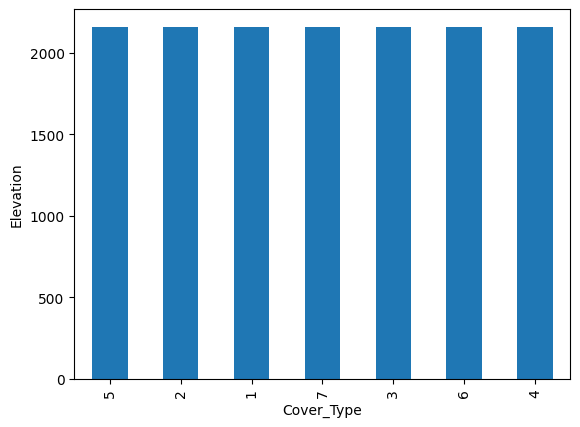

In [15]:
df['Cover_Type'].value_counts().plot(kind='bar', y = df.Elevation.mean(), ylabel='Elevation')

In [16]:
mean_values = df.groupby('Cover_Type').mean().reset_index()
mean_values

,Cover_Type,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
0,1,7996.077778,3128.025926,159.463426,13.112963,271.507407,41.281481,2579.715741,211.690278,223.248611,144.065741,1994.412963,1.932870,27.659259
1,2,6312.696759,2922.540278,151.097222,13.423611,287.728704,47.337963,2425.791667,214.044444,225.369907,142.950926,2155.277315,1.928704,24.589815
2,3,8127.537500,2398.423148,173.672685,20.628704,210.723148,64.081944,969.595833,201.655556,216.561111,141.549537,916.909722,3.600463,6.375926
3,4,6354.585648,2223.420370,138.099537,18.468519,104.537500,40.143519,915.100463,227.968056,216.889815,111.808796,860.540741,4.000000,7.065278
4,5,6486.800463,2786.801389,137.992130,16.724537,208.873148,50.871296,1329.318519,223.368981,218.317130,121.392593,1530.388889,2.207407,21.686574
5,6,8061.305093,2423.276852,180.617130,18.986111,160.095370,44.873611,1064.980556,193.562963,209.960648,147.682407,1057.654167,3.554630,10.150463
6,7,9584.496759,3362.769907,155.794444,14.166667,346.904630,68.945833,2713.659722,216.639815,222.412037,136.193981,2062.847222,2.378704,36.672222


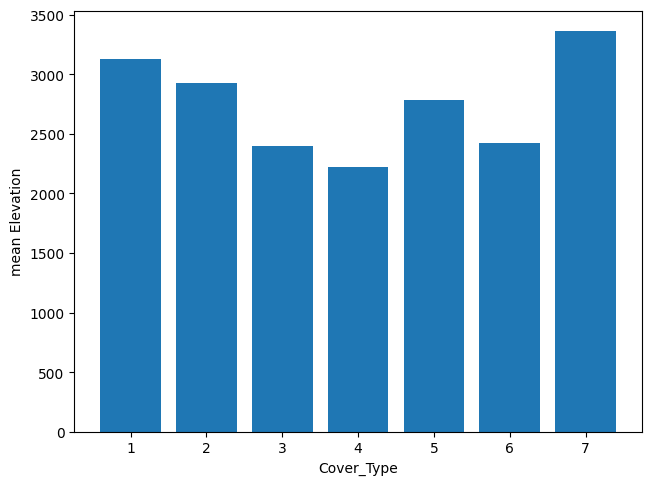

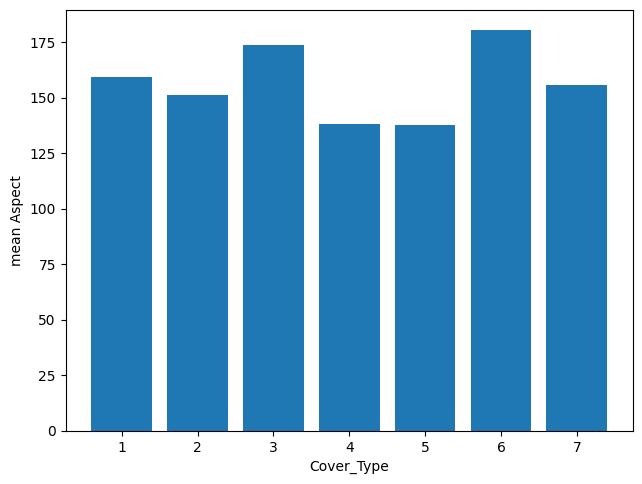

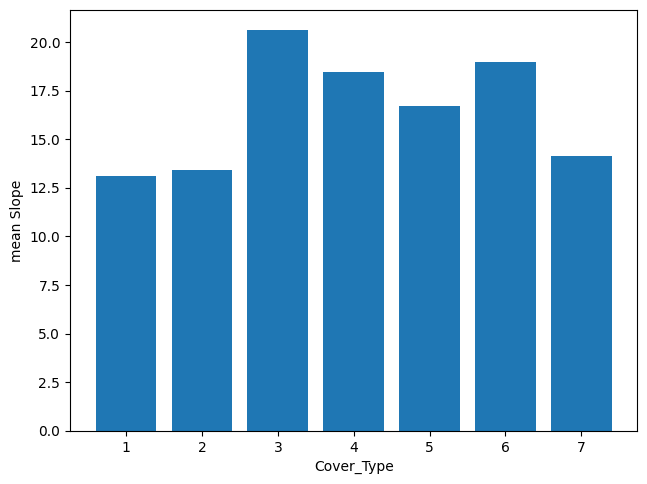

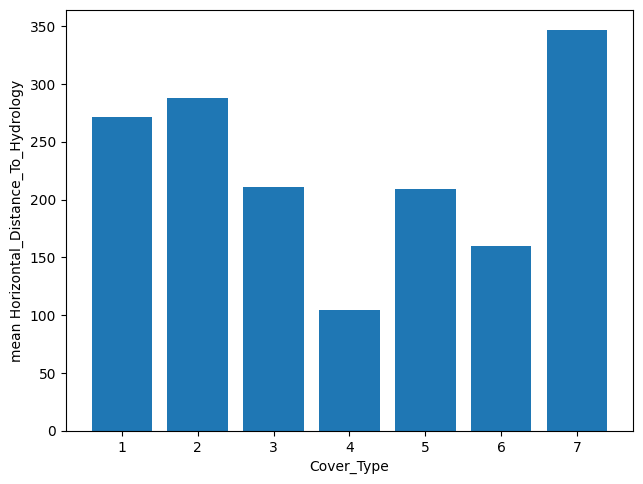

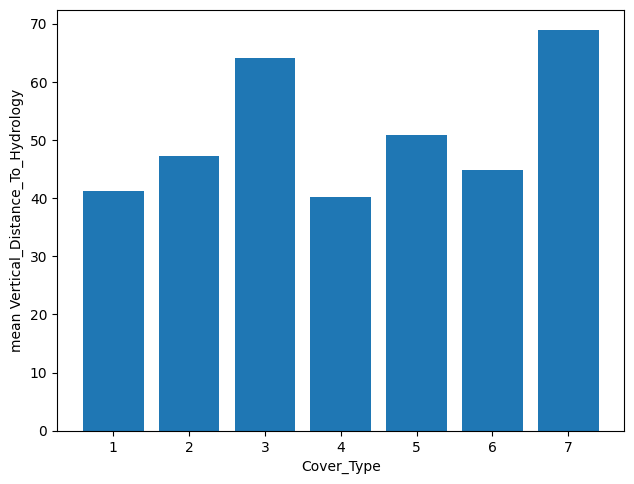

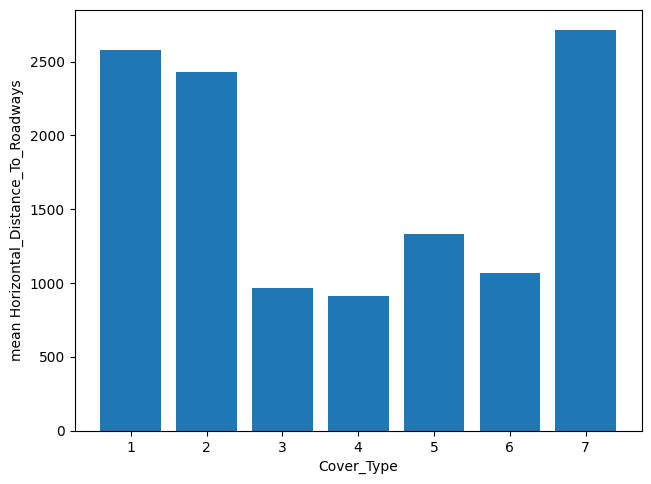

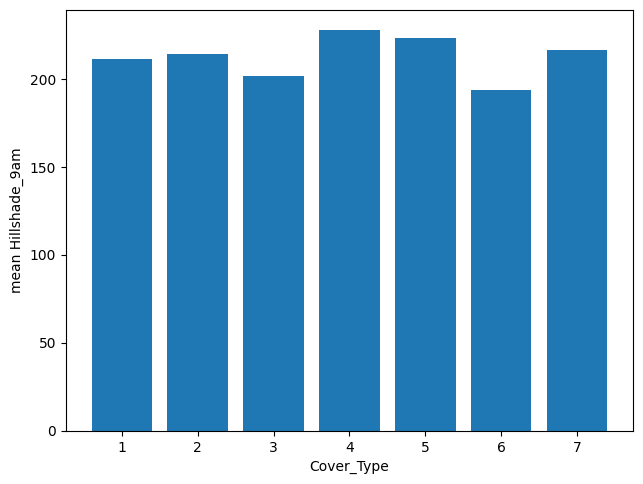

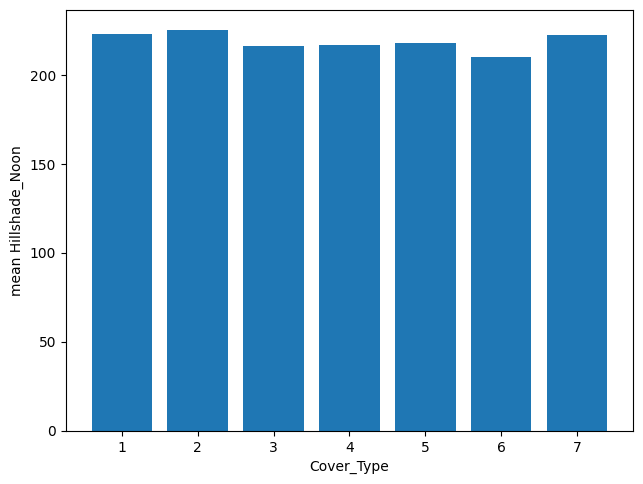

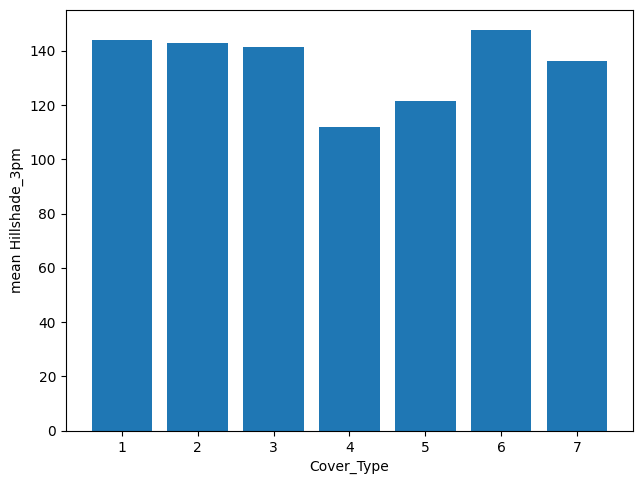

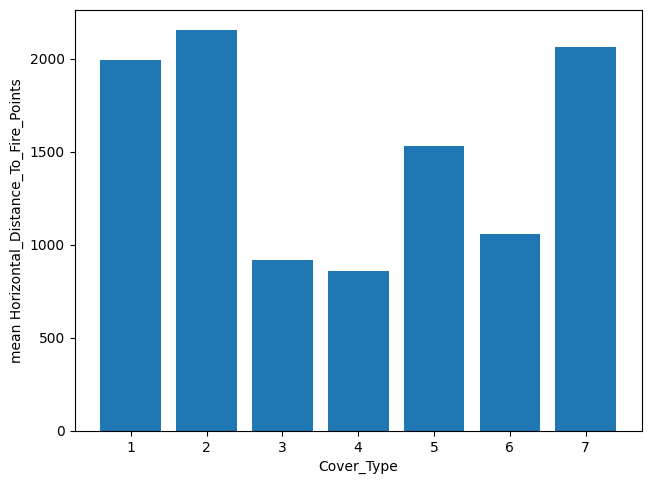

In [17]:
for i, value in enumerate(mean_values.columns[2:12]):
    fig, ax = plt.subplots()
    fig.tight_layout(h_pad=50.0)
    ax.bar(mean_values.Cover_Type, mean_values[value])
    ax.set_xlabel("Cover_Type")
    ax.set_ylabel(f"mean {value}")
    plt.show()

In [18]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,1,29
...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,3,4
15116,2603,121,19,633,195,618,249,221,91,1325,3,4
15117,2492,134,25,365,117,335,250,220,83,1187,3,4
15118,2487,167,28,218,101,242,229,237,119,932,3,4


In [19]:
X = X.to_numpy()
y = y.to_numpy()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit_transform(X_train)
# scaler.fit_transform(X_test)

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
clf = RandomForestClassifier(n_estimators=100, random_state=17, n_jobs=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [24]:
accuracy = accuracy_score(y_test, y_pred)

In [25]:
accuracy

0.845734126984127

In [26]:
# Проверка на кросс-валидационном множестве

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5)

In [27]:

y_pred_final = clf.predict(X_test)

df_test = pd.read_csv('test.csv')
df_test

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565887,581008,2396,153,20,85,17,108,240,237,118,...,0,0,0,0,0,0,0,0,0,0
565888,581009,2391,152,19,67,12,95,240,237,119,...,0,0,0,0,0,0,0,0,0,0
565889,581010,2386,159,17,60,7,90,236,241,130,...,0,0,0,0,0,0,0,0,0,0
565890,581011,2384,170,15,60,5,90,230,245,143,...,0,0,0,0,0,0,0,0,0,0


In [28]:
submission = pd.DataFrame({'Id': df_test.Id,
                   'Cover_Type': y_pred})
submission.to_csv('submission.csv')

ValueError: array length 6048 does not match index length 565892

In [ ]:
df